# Read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import string
import re
import time
import nltk
import math
import numpy as np
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     learning_curve)

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
upload = files.upload()

Saving Training Data Set.csv to Training Data Set.csv


In [ ]:
df = pd.read_csv("Training Data Set.csv")
df

,CVSS,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
1,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
2,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
3,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
4,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
...,...,...,...,...,...,...,...,...,...,...
23913,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23914,1.9,122591,CVE-2018-10545,tcp,443,PHP 5.6.x < 5.6.35 Security Bypass Vulnerability,The version of PHP running on the remote web s...,"According to its banner, the version of PHP ru...",Upgrade to PHP version 5.6.35 or later.,http://php.net/ChangeLog-5.php#5.6.35
23915,1.9,128115,CVE-2019-1552,tcp,80,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23916,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....


# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23918 entries, 0 to 23917
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CVSS         23918 non-null  float64
 1   Plugin ID    23918 non-null  int64  
 2   CVE          16086 non-null  object 
 3   Protocol     23918 non-null  object 
 4   Port         23918 non-null  int64  
 5   Name         23918 non-null  object 
 6   Synopsis     23918 non-null  object 
 7   Description  23918 non-null  object 
 8   Solution     23917 non-null  object 
 9   See Also     20584 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.8+ MB


In [ ]:
df.columns

Index(['CVSS', 'Plugin ID', 'CVE', 'Protocol', 'Port', 'Name', 'Synopsis',
       'Description', 'Solution', 'See Also'],
      dtype='object')

In [ ]:
# numeric variables description
df.describe()

,CVSS,Plugin ID,Port
count,23918.000000,23918.000000,23918.000000
mean,5.330387,56342.316916,3291.710427
std,2.277494,25238.518742,4726.713692
min,1.500000,10043.000000,0.000000
25%,2.600000,33850.000000,443.000000
50%,5.000000,57690.000000,3389.000000
75%,7.100000,71049.000000,5666.000000
max,10.000000,128523.000000,65470.000000


In [ ]:
df.groupby("CVSS").describe()

Plugin ID                                                             \
         count           mean           std       min       25%       50%   
CVSS                                                                        
1.5        1.0  118823.000000           NaN  118823.0  118823.0  118823.0   
1.9       11.0  125604.090909   2884.814914  122591.0  122591.0  128115.0   
2.1       11.0   55541.818182  36069.018442   39330.0   39330.0   39330.0   
2.6     6191.0   63053.485867  16252.668613   10407.0   65821.0   65821.0   
3.5        2.0  121620.000000      0.000000  121620.0  121620.0  121620.0   
4.0       40.0   60418.125000   1961.402719   60108.0   60108.0   60108.0   
4.3     3797.0   62275.201738  22119.552502   10891.0   57690.0   58453.0   
4.4      288.0   28181.000000      0.000000   28181.0   28181.0   28181.0   
4.6       25.0  104395.160000  18946.304195   73862.0   97144.0   97144.0   
4.7        4.0  108772.000000   3450.245209  105784.0  105784.0  108772.0   
5.0     3759.0   40329.101357  18497.198892   10043.0   35291.0   42873.0   
5.1      567.0   20407.783069  12104.844821   17765.0   18405.0   18405.0   
5.6        4.0  104408.000000      0.000000  104408.0  104408.0  104408.0   
5.8       87.0   85423.264368  14944.112027   17762.0   90510.0   90510.0   
6.0        1.0   97524.000000           NaN   97524.0   97524.0   97524.0   
6.4     2318.0   54295.350733   5789.691282   40467.0   51192.0   51192.0   
6.8      429.0   43007.172494  25818.455679   25971.0   25971.0   25971.0   
6.9        2.0   62101.000000      0.000000   62101.0   62101.0   62101.0   
7.1     1163.0   20445.368874   4966.198350   20007.0   20007.0   20007.0   
7.5     2415.0   54322.651760  29073.055603   10483.0   31649.0   41014.0   
7.8      339.0   66039.522124  31350.084086   17797.0   43408.5   69020.0   
8.5       10.0   89410.300000  22987.705371   62701.0   62701.0  107216.0   
9.0       66.0   51482.939394   6467.986625   49272.0   49272.0   49272.0   
9.3      103.0   81452.427184  16746.367916   17760.0   76345.0   78547.0   
9.7      106.0   59851.000000      0.000000   59851.0   59851.0   59851.0   
10.0    2179.0   88533.015145  21566.513195   10262.0   83033.0   94654.0   

                            Port                                              \
           75%       max   count          mean           std     min     25%   
CVSS                                                                           
1.5   118823.0  118823.0     1.0   1500.000000           NaN  1500.0  1500.0   
1.9   128115.0  128115.0    11.0    278.000000    189.570567    80.0    80.0   
2.1    39330.0  128495.0    11.0   5757.272727   3202.745762     0.0  4849.0   
2.6    70658.0  105291.0  6191.0   3998.732192   4423.072753    21.0  1433.0   
3.5   121620.0  121620.0     2.0    443.000000      0.000000   443.0   443.0   
4.0    60108.0   72513.0    40.0   5582.125000   2530.513682   389.0  5556.0   
4.3    78479.0  126627.0  3797.0   4198.673163   3612.300370    22.0  3389.0   
4.4    28181.0   28181.0   288.0    100.166667     83.294030    80.0    80.0   
4.6   126987.0  126987.0    25.0    692.840000    635.106991    80.0    80.0   
4.7   111760.0  111760.0     4.0    443.000000      0.000000   443.0   443.0   
5.0    42873.0  128523.0  3759.0   3411.041234   5524.176734     7.0   443.0   
5.1    18405.0  128033.0   567.0   3299.216931    827.934633    80.0  3389.0   
5.6   104408.0  104408.0     4.0    261.500000    209.578148    80.0    80.0   
5.8    90510.0   90891.0    87.0  10808.942529  21372.299176     0.0  1025.0   
6.0    97524.0   97524.0     1.0   1500.000000           NaN  1500.0  1500.0   
6.4    57582.0  124763.0  2318.0   4086.451682   6390.974978    80.0  1433.0   
6.8    43351.0  127131.0   429.0    460.536131   1419.749223    80.0    80.0   
6.9    62101.0   62101.0     2.0   8080.000000      0.000000  8080.0  8080.0   
7.1    20007.0   77086.0  1163.0   5030.844368   5609.179154    25.0  1433.0   
7.5    8202

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 5.33 and sigma = 2.28



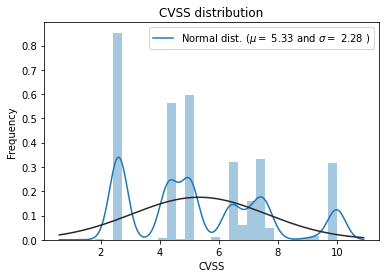

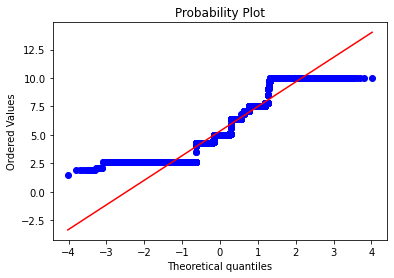

In [ ]:
# Check distribution of the target variable
sns.distplot(df["CVSS"], fit = norm);
(mu, sigma) = norm.fit(df["CVSS"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('CVSS distribution')

# Get also the QQ-plot
# If normally distributed data, observations should lie approximately on a straight line.
fig = plt.figure()
res = stats.probplot(df["CVSS"], plot=plt)
plt.show();

From the QQ-plot, we can see that linear regression is hard to fit all training dataset. **From this observation, using tree-based models or nonlinear which does not require data normally distributed is a good solution.**

There are two numerical variables including Plugin ID	and Port, the remaining variables are text. We will transform text variables to numeric variables later, but let's discover insights from the current ones.

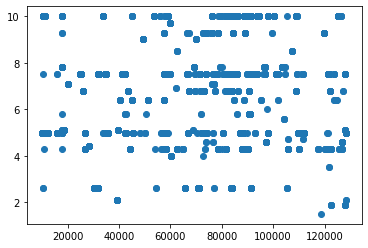

In [ ]:
plt.scatter(df['Plugin ID'], df['CVSS'])

It seems like there is no patern, i.e., Plugin ID is not significant for predicting CVSS

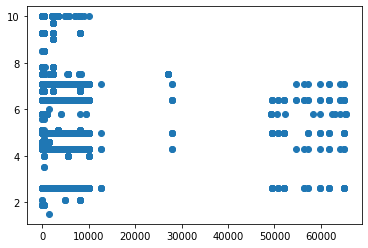

In [ ]:
plt.scatter(df['Port'], df['CVSS'])

Look at the scatter plot above, Port numbers ranging from 0->10000 and 50000 -> 60000 may affect to the CVSS score. It maybe a good feature.

# Data Preprocessing
### 1. Tokenization 
Tokenization is a common technique that split a sentence into tokens, where a token could be characters, words, phrases, symbols, or other meaningful elements. By breaking sentences into smaller chunks, that would help to investigate the words in a sentence and also the subsequent steps in the NLP pipeline

### 2. Remove Stop Words
Stop words are common words in any language that occur with a high frequency but do not deliver meaningful information for the whole sentence. For example, {“a”, “about”, “above”, “across”, “after”, “afterward”, “again”, ...} can be considered as stop words. Traditionally, we could remove all of them in the text preprocessing stage. Removing stop words is a common method in NLP text preprocessing, whereas, it needs to be experimented carefully depending on different situations.

### 3. Steaming
Stemming is a process of extracting a root word - identifying a common stem among various forms (e.g., singular and plural noun form) of a word

### 4. Lemmatization
Lemmatization is the task of determining that two words have the same root, despite their surface differences

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
    #characters and then strip
    # Note: lowercase might cause prediction result. In this case, I tested with both capital and lowercase, which has similar results
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## 1. Tokenize (convert from string to list)
    lst_text = text.split()
    ## 2. Remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text


In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")

### 5. Preprocessing Categorical Columns

*   Fill missing "CVE" with “unknown”.
*   Convert categorical columns as "category" type

In [ ]:
# Clean the dataset
def dataProcessing(df):
  # Clean "Name" column
  df["Name"] = df["Name"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
  # Clean "Synopsis"
  df["Synopsis"] = df["Synopsis"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=None))
  # Clean "Description" column
  df["Description"] = df["Description"].apply(lambda x: 
            utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
            lst_stopwords=None))
  # Clean "Solution" column
  df["Solution"] = df["Solution"].apply(lambda x: 
            utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
            lst_stopwords=None))
  
  # One hot encoding categorical columns including Plugin ID, CVE, Protocol, Port
  df["Plugin ID"] = df["Plugin ID"].astype("category")
  # Replace NAN with 0 in CVE column
  df["CVE"] = df["CVE"].fillna("unknown").astype("category")
  df["Protocol"] = df["Protocol"].astype("category")
  df["Port"] = df["Port"].astype("category")

  return df

In [ ]:
df = dataProcessing(df)


In [ ]:
df.head()

,CVSS,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,10.0,33850,unknown,tcp,0,unix operating system unsupported version dete...,the operating system running on the remote hos...,according to it selfreported version number th...,upgrade to a version of the unix operating sys...,NaN
1,10.0,33850,unknown,tcp,0,unix operating system unsupported version dete...,the operating system running on the remote hos...,according to it selfreported version number th...,upgrade to a version of the unix operating sys...,NaN
2,10.0,33850,unknown,tcp,0,unix operating system unsupported version dete...,the operating system running on the remote hos...,according to it selfreported version number th...,upgrade to a version of the unix operating sys...,NaN
3,10.0,33850,unknown,tcp,0,unix operating system unsupported version dete...,the operating system running on the remote hos...,according to it selfreported version number th...,upgrade to a version of the unix operating sys...,NaN
4,10.0,33850,unknown,tcp,0,unix operating system unsupported version dete...,the operating system running on the remote hos...,according to it selfreported version number th...,upgrade to a version of the unix operating sys...,NaN


# Splitting data

In [ ]:
target = df.CVSS.values
features = df[["Plugin ID","CVE","Protocol","Port","Name","Synopsis","Description","Solution"]].copy()
# features = df[["Plugin ID","CVE","Protocol","Port","Description"]].copy()

In [ ]:
# split X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19134, 8)
(4784, 8)
(19134,)
(4784,)


In [ ]:
X_test

,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution
18252,65821,CVE-2013-2566,tcp,3389,ssl rc4 cipher suite supported bar mitzvah,the remote service support the use of the rc4 ...,the remote host support the use of rc4 in one ...,reconfigure the affected application if possib...
14569,57690,unknown,tcp,3389,terminal service encryption level medium low,the remote host is using weak cryptography,the remote terminal service service is not con...,change rdp encryption level to one of 3 high 4...
15754,62565,CVE-2012-4930,tcp,8089,transport layer security tl protocol crime vul...,the remote service ha a configuration that may...,the remote service ha one of two configuration...,disable compression and or the spdy service
12923,42873,CVE-2016-2183,tcp,443,ssl medium strength cipher suite supported swe...,the remote service support the use of medium s...,the remote host support the use of ssl cipher ...,reconfigure the affected application if possib...
23440,65821,CVE-2015-2808,tcp,443,ssl rc4 cipher suite supported bar mitzvah,the remote service support the use of the rc4 ...,the remote host support the use of rc4 in one ...,reconfigure the affected application if possib...
...,...,...,...,...,...,...,...,...
7598,51192,unknown,tcp,1433,ssl certificate cannot trusted,the ssl certificate for this service cannot be...,the server x509 certificate cannot be trusted ...,purchase or generate a proper certificate for ...
5584,20007,unknown,tcp,443,ssl version 2 3 protocol detection,the remote service encrypts traffic using a pr...,the remote service accepts connection encrypte...,consult the application documentation to disab...
3880,24907,CVE-2007-1701,tcp,80,php 521 multiple vulnerability,the remote web server u a version of php that ...,according to it banner the version of php inst...,upgrade to php version 521 or later
822,97994,unknown,tcp,80,microsoft ii 60 unsupported version detection,an unsupported version of microsoft ii is runn...,according to it selfreported version number th...,upgrade to a version of microsoft ii that is c...


# Feature Engineering
* Encode "Plugin ID", "CVE", "Protocol" and "Port" categorical variables using OnehotEncoder
* Extract Features from Text with TF-IDF

To the best of my understanding, combining the text columns to convert text to numeric data is not a good way to extract insights. Because, a word in the first column may have a positive association with the target, whereas that some words in the second column may have a negative association with the target, and combining the columns would prevent the model from learning those two separate relationships.

In [ ]:
MAX_FEAT_DESCP = 50000
preprocess = ColumnTransformer(
    [
     ('cve_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['CVE']),
     ('port_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['Port']),
     ('plugin_id_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['Plugin ID']),
     ('protocol_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['Protocol']),
     ('name_tfidf', TfidfVectorizer(max_features = MAX_FEAT_DESCP, stop_words = None, ngram_range=(1,4)), 'Name'),
     ('synopsis_tfidf', TfidfVectorizer(max_features = MAX_FEAT_DESCP, stop_words = None, ngram_range=(1,4)), 'Synopsis'),
     ('solution_tfidf', TfidfVectorizer(max_features = MAX_FEAT_DESCP, stop_words = None, ngram_range=(1,4)), 'Solution'),
     ('des_tfidf', TfidfVectorizer(max_features = MAX_FEAT_DESCP, stop_words = None, ngram_range=(1,4)), 'Description')
    ],
    remainder='passthrough'
    )

# Model Building

### 1. Linear model

In [ ]:
ridge_model = make_pipeline(
    preprocess,
    Ridge(solver = "lsqr", fit_intercept=False)
    )

start = time.time()
ridge_model.fit(X_train, y_train)
end = time.time()
print(end - start)

print(ridge_model)
y_pred = ridge_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.4f' % test_rmse)

12.99749493598938
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cve_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['CVE']),
                                                 ('port_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Port']),
                                                 ('plugin_id_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Plugi

I just tested with Ridge model to see how it works with linear model. RMSE is 0.1131 is not that bad. We can see adding significant features help in this case.

### 2. Decision Tree

In [ ]:
dt_model = make_pipeline(
    preprocess,
    DecisionTreeRegressor(max_depth = None, ccp_alpha = 0)
    )

start = time.time()
dt_model.fit(X_train, y_train)
end = time.time()
print(end - start)

print(dt_model)
y_pred = dt_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.4f' % test_rmse)

13.690248727798462
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cve_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['CVE']),
                                                 ('port_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Port']),
                                                 ('plugin_id_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Plug

DT model is simple to understand, providing a clear visual to guide the decision making progress. However, this simplicity comes with a few serious disadvantages, including overfitting, error due to bias and error due to variance. 
* Overfitting happens for many reasons, including presence of noise and lack of representative instances. It’s possible for overfitting with one large (deep) tree. 
* Bias error happens when you place too many restrictions on target functions. For example, restricting your result with a restricting function (e.g. a linear equation) or by a simple binary algorithm (like the true/false choices in the above tree) will often result in bias.

* Variance error refers to how much a result will change based on changes to the training set. Decision trees have high variance, which means that tiny changes in the training data have the potential to cause large changes in the final result.

***To overcome those above issues, I used resemble methods like Random Forest and Gradient Boosting.***

### 3. Random Forest Model

In [ ]:
rfr_model = make_pipeline(
    preprocess,
    RandomForestRegressor(n_estimators=100)
    )

start = time.time()
rfr_model.fit(X_train, y_train)
end = time.time()
print(end - start)

print(rfr_model)
y_pred = rfr_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.4f' % test_rmse)

351.1833291053772
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cve_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['CVE']),
                                                 ('port_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Port']),
                                                 ('plugin_id_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Plugi

Random forests reduce the variance seen in decision trees by:
* Using different samples for training,
* Specifying random feature subsets, 
* Building and combining small (shallow) trees.

A single decision tree is a weak predictor, but is relatively fast to build. More trees give us a more robust model and prevent overfitting. However, the more trees we have, the slower the process. Each tree in the forest has to be generated, processed, and analyzed. In addition, the more features we have, the slower the process; Reducing the set of features can dramatically speed up the process.

### 4. Gradient Boosting

In [ ]:
gb_model = make_pipeline(
    preprocess,
    GradientBoostingRegressor(n_estimators=100)
    )

start = time.time()
gb_model.fit(X_train, y_train)
end = time.time()
print(end - start)

print(gb_model)
y_pred = gb_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.4f' % test_rmse)

101.55603647232056
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cve_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['CVE']),
                                                 ('port_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Port']),
                                                 ('plugin_id_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Plug

Like random forests, gradient boosting is a set of decision trees. The two main differences are:

* How trees are built: random forests builds each tree independently while gradient boosting builds one tree at a time. This additive model (ensemble) works in a forward stage-wise manner, introducing a weak learner to improve the shortcomings of existing weak learners. 
* Combining results: random forests combine results at the end of the process (by averaging or “majority rules”) while gradient boosting combines results along the way.
If we carefully tune parameters, gradient boosting can result in better performance than random forests. However, gradient boosting may not be a good choice if we have a lot of noise, as it can result in overfitting. They also tend to be harder to tune than random forests.

### 5. MLP model

In [ ]:
mlp_model = make_pipeline(
    preprocess,
    MLPRegressor(hidden_layer_sizes=100, activation='relu', random_state=1, max_iter=500)
    )

start = time.time()
mlp_model.fit(X_train, y_train)
end = time.time()
print(end - start)

print(mlp_model)
y_pred = mlp_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.4f' % test_rmse)

353.84950709342957
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cve_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['CVE']),
                                                 ('port_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Port']),
                                                 ('plugin_id_category',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Plug

### 6. Voting Classifer 

In [ ]:
# Voting Classifer implements ensembling simply by averaging the individual predictions to form a final prediction. 
# the default ‘hard’ parameter uses predicted class labels for majority rule voting
voting_classifier = VotingRegressor(estimators=[
    ('rd', ridge_model), ('dt', dt_model),
    ('rfr', rfr_model), ('gb', gb_model), 
    ('mlp', mlp_model)])

In [ ]:
voting_classifier.fit(X_train, y_train)

VotingRegressor(estimators=[('rd',
                             Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cve_category',
                                                                               OneHotEncoder(dtype='int',
                                                                                             handle_unknown='ignore'),
                                                                               ['CVE']),
                                                                              ('port_category',
                                                                               OneHotEncoder(dtype='int',
                                                                                             handle_unknown='ignore'),
                                                                               

In [ ]:
y_pred1 = voting_classifier.predict(X_test)
test_rmse1 = np.sqrt(mean_squared_error(y_pred1, y_test))
print('Test RMSE: %.4f' % test_rmse1)

Test RMSE: 0.1210


# Pre-processing on testing set

In [ ]:
Dr_Shah_TestingSet = files.upload()

Saving Testing Data Set.csv to Testing Data Set.csv


In [ ]:
df1 = pd.read_csv("Testing Data Set.csv")
df1

,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,90150,CVE-2015-1791,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
1,90150,CVE-2015-1792,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
2,90150,CVE-2015-1793,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
3,90150,CVE-2015-3143,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
4,90150,CVE-2015-3145,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
...,...,...,...,...,...,...,...,...,...
2592,65821,CVE-2015-2808,tcp,3389,SSL RC4 Cipher Suites Supported (Bar Mitzvah),The remote service supports the use of the RC4...,The remote host supports the use of RC4 in one...,"Reconfigure the affected application, if possi...",http://www.nessus.org/u?ac7327a0\nhttp://cr.yp...
2593,83738,CVE-2015-4000,tcp,5666,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...,The remote host supports a set of weak ciphers.,The remote host supports EXPORT_DHE cipher sui...,Reconfigure the service to remove support for ...,https://weakdh.org/
2594,83875,CVE-2015-4000,tcp,443,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...,The remote host allows SSL/TLS connections wit...,The remote host allows SSL/TLS connections wit...,Reconfigure the service to use a unique Diffie...,https://weakdh.org/
2595,31705,CVE-2007-1858,tcp,5666,SSL Anonymous Cipher Suites Supported,The remote service supports the use of anonymo...,The remote host supports the use of anonymous ...,Reconfigure the affected application if possib...,http://www.nessus.org/u?3a040ada


In [ ]:
df1 = dataProcessing(df1)
df1.head()

,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,90150,CVE-2015-1791,tcp,2381,hp system management homepage 754 multiple vul...,the remote web server is affected by multiple ...,according to the web server banner the version...,upgrade to hp system management homepage smh v...,http://www.nessus.org/u?d91095a9\nhttps://weak...
1,90150,CVE-2015-1792,tcp,2381,hp system management homepage 754 multiple vul...,the remote web server is affected by multiple ...,according to the web server banner the version...,upgrade to hp system management homepage smh v...,http://www.nessus.org/u?d91095a9\nhttps://weak...
2,90150,CVE-2015-1793,tcp,2381,hp system management homepage 754 multiple vul...,the remote web server is affected by multiple ...,according to the web server banner the version...,upgrade to hp system management homepage smh v...,http://www.nessus.org/u?d91095a9\nhttps://weak...
3,90150,CVE-2015-3143,tcp,2381,hp system management homepage 754 multiple vul...,the remote web server is affected by multiple ...,according to the web server banner the version...,upgrade to hp system management homepage smh v...,http://www.nessus.org/u?d91095a9\nhttps://weak...
4,90150,CVE-2015-3145,tcp,2381,hp system management homepage 754 multiple vul...,the remote web server is affected by multiple ...,according to the web server banner the version...,upgrade to hp system management homepage smh v...,http://www.nessus.org/u?d91095a9\nhttps://weak...


In [ ]:
# testting_set = df1[["Plugin ID","CVE","Protocol","Port","Description"]].copy()
testting_set = df1[["Plugin ID","CVE","Protocol","Port","Name","Synopsis","Description","Solution"]].copy()
testting_set

,Plugin ID,CVE,Protocol,Port,Description
0,90150,CVE-2015-1791,tcp,2381,according to the web server banner the version...
1,90150,CVE-2015-1792,tcp,2381,according to the web server banner the version...
2,90150,CVE-2015-1793,tcp,2381,according to the web server banner the version...
3,90150,CVE-2015-3143,tcp,2381,according to the web server banner the version...
4,90150,CVE-2015-3145,tcp,2381,according to the web server banner the version...
...,...,...,...,...,...
2592,65821,CVE-2015-2808,tcp,3389,the remote host support the use of rc4 in one ...
2593,83738,CVE-2015-4000,tcp,5666,the remote host support export_dhe cipher suit...
2594,83875,CVE-2015-4000,tcp,443,the remote host allows ssltls connection with ...
2595,31705,CVE-2007-1858,tcp,5666,the remote host support the use of anonymous s...


In [ ]:
y_pred1 = voting_classifier.predict(testting_set)
y_pred1

array([9.95573755, 9.95425845, 9.95051354, ..., 2.64614487, 2.63235125,
       2.60675864])

In [ ]:
np.savetxt("predicted.csv", y_pred1)